In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#1A
N = 10000 # TIME STEPS
M = 100 # BURN-IN

def f(array):
    value = np.zeros(10)
    for j in range(10):
        value[j] = np.exp(-array[j]) if array[j] > 0 else 0
    return np.prod(value)

product = np.zeros(N)
#x1 = np.zeros(N)
x1con = []

x = np.zeros((2, 10))
x[0] = np.array([np.power(21, 1/10) for i in range(10)])

product[0] = np.prod(x[0])
#x1[0] = x[0][0]

for i in range(1, N):

    # generate new state
    for j in range(10):
        x[1][j] = np.random.uniform(x[0][j]-1, x[0][j]+1)
    
    # acceptance rejection
    q = f(x[1])/f(x[0])
    p = np.min([q, 1])
    u = np.random.uniform(0, 1)

    if (u < p):
        x[0] = x[1]
    else:
        None

    product[i] = np.prod(x[0])
    if (product[i] > 20):
        x1con.append(x[0][0])
    #x1[i] = x[0][0]
    
#print(f"point estimate of E[XYZ]: {np.sum(xyz[M:N])/(N-M)}")

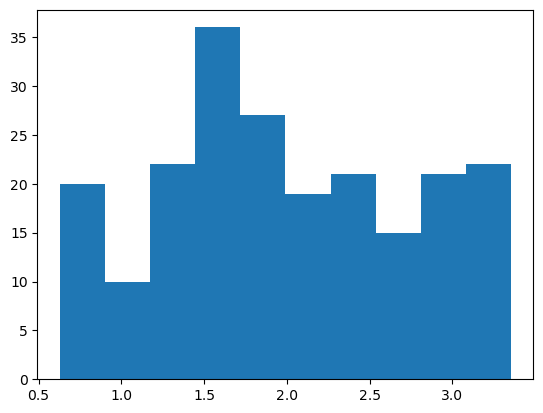

In [82]:
plt.hist(x1con, bins=10)
plt.show()

In [83]:
#2A
N = 1000000 # TIME STEPS
M = 100 # BURN-IN

def f(x, y, z):
    return np.exp(-(x + y + z + x*y + x*z + y*z)) if (x > 0 and y > 0 and z > 0) else 0

xyz = np.zeros(N)
x = np.zeros(2)
y = np.zeros(2)
z = np.zeros(2)

x[0], y[0], z[0] = 1, 1, 1
xyz[0] = 1

for i in range(1, N):
    # generate new state xyz
    x[1] = np.random.uniform(x[0] - 1, x[0] + 1)
    y[1] = np.random.uniform(y[0] - 1, y[0] + 1)
    z[1] = np.random.uniform(x[0] - 1, x[0] + 1)

    # accept new state with probability:
    q = f(x[1], y[1], z[1])/f(x[0], y[0], z[0])
    p = np.min([q, 1])

    u = np.random.uniform(0, 1)
    if (u < p):
        xyz[i] = x[1]*y[1]*z[1]
        x[0], y[0], z[0] = x[1], y[1], z[1]
    else:
        xyz[i] = x[0]*y[0]*z[0]

print(f"point estimate of E[XYZ]: {np.sum(xyz[M:N])/(N-M)}")

point estimate of E[XYZ]: 0.09556439276570412


In [84]:
#2B
N = 1000000 # TIME STEPS
M = 100 # BURN-IN

# initialize data structures

xyz = np.zeros((N, 3))
xyz[0] = np.array([1, 1, 1])

data = np.zeros(N)
data[0] = np.prod(xyz[0])

coord = 0

for i in range(1, N):

    # choose coordinate to resample
    if (coord > 2):
        coord = 0
    
    # gather last state
    x = xyz[i-1][0]
    y = xyz[i-1][1]
    z = xyz[i-1][2]

    if (coord == 0):
        xyz[i][0] = np.random.exponential(1/(1 + y + z))
        xyz[i][1] = y
        xyz[i][2] = z
    elif (coord == 1):
        xyz[i][0] = x
        xyz[i][1] = np.random.exponential(1/(1 + x + z))
        xyz[i][2] = z
    else:
        xyz[i][0] = x
        xyz[i][1] = y
        xyz[i][2] = np.random.exponential(1/(1 + x + y))
    
    coord += 1
    data[i] = np.prod(xyz[i])

print(f"point estimate of E[XYZ]: {np.sum(data[M:N])/(N-M)}")

point estimate of E[XYZ]: 0.08732648322728209


3 (a)

interarrival times
- sum exponentials until reaching terminal time

A = list of times

t = 0, I = 0
while t < T:
    t += Exp(2)
    I = I + 1
    A(I) = t

output (I-1) and A(i), i = 1,..., i-1


conditional representation
- simulate poisson, then distribute uniformly

Generate N(T) ~ Poi(2*10)
n = N(T).
Generate n i.i.d. Unif(0, 1)
Sort in increasing order
output n and A_i = T*U_(i).

In [85]:
# 3b

N = 10000
all_occupied = np.zeros(N)

for j in range(N):
    
    arrivals = []
    exits = []

    t = 0
    I = 0

    while (t < 10):
        x = np.random.exponential(1/2)
        t += x
        arrivals.append(x)
        exits.append(np.random.exponential(1))
        I += 1

    arrivals = np.cumsum(arrivals)
    exits = np.add(arrivals, exits)

    i = 0

    busy = set()

    while (arrivals[i] < 10):

        removal = []

        for item in busy:
            if (item < arrivals[i]):
                removal.append(item)
        
        for item in removal:
            busy.remove(item)
        
        if (len(busy) < 3):
            busy.add(exits[i])
            i += 1

        elif (len(busy) == 3):
            arrivals = np.delete(arrivals, i)
            exits = np.delete(exits, i)

    removal = []

    for item in busy:
        if (item < 10):
            removal.append(item)

    for item in removal:
        busy.remove(item)
    
    all_occupied[j] = 1 if len(busy) == 3 else 0

print(f"probability of all being busy: {np.sum(all_occupied)/(N)} ")

probability of all being busy: 0.2174 
